#連結到雲端硬碟的檔案

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#讀取基本套件

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #專業繪圖套件
from scipy import misc
import scipy.misc

#讀入圖片並轉成灰階

In [0]:
#先定義轉成灰階的函數
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
  
#img_gray = rgb2gray(img)
#plt.imshow(img_gray)

In [0]:
from PIL import Image

In [49]:
#讀入圖片並轉成灰階(png的空白處會變成黑色，建議統一使用jpg)
Album = []
y = []

for i in range(1,189):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/bar/bar ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    #png的空白處會變成黑色，建議統一使用jpg
    #imread可將圖片檔轉成array
    #print("此圖片的矩陣\n",img)
    #plt.imshow(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(1)                #將不同種類的圖分類
    #print(len(Album)) 

for i in range(1,166):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/histogram/histogram ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(2)                #將不同種類的圖分類
    #print(len(Album))  

for i in range(1,266):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/pie/pie ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(3)                #將不同種類的圖分類
    #print(len(Album))  

for i in range(1,203):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/bubble/bubble ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(4)                #將不同種類的圖分類
    #print(len(Album))  


for i in range(1,163):
    img = Image.open("/content/gdrive/Team Drives/ML概論專題/scatter/scatter ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(5)                #將不同種類的圖分類
    #print(len(Album))  


for i in range(1,186):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/line/line ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(6)                #將不同種類的圖分類

for i in range(1,201):
    img =Image.open("/content/gdrive/Team Drives/ML概論專題/fool/fool ("+str(i)+").jpg")
    img =img.resize((200,200))
    #imgplot = plt.imshow(img)
    img = np.asarray(img)
    img = rgb2gray(img)/255
    Album.append(img)
    y.append(7)                #將不同種類的圖分類  

print(len(Album))  
  

1367


In [0]:
#將list型態的資料轉成array
X = Album
X = np.array(X)
y = np.array(y)

# 將資料進行分割

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
print("data分割完成")

data分割完成


In [52]:
print("X_train的維度",X_train.shape)
print("X_test的維度",X_test.shape)
print("y_train的維度",y_train.shape)
print("y_test的維度",y_test.shape)

X_train的維度 (956, 200, 200)
X_test的維度 (411, 200, 200)
y_train的維度 (956,)
y_test的維度 (411,)


#讀取Confusion Matrix套件和定義畫出它的函數

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

#模型訓練

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train =X_train.reshape(len(X_train),200*200)
X_test =X_test.reshape(len(X_test),200*200)

RandomForestClassifier的參數：
* bootstrap=True：是否有放回採樣樣本。
* class_weight=None：各個label的權重。
* criterion='gini' ：'gini' or 'entropy'     
 * 若我們的決策樹使用Information Gain方法，那麼系統便會計算其Entropy作為節點分類的依據。
 * GINI係數與INFORMATION GAIN兩者有一個最大的差別：INFORMATION GAIN一次可產生多個不同節點，而GINI係數一次僅能產生兩個，即True或False的Binary分類。
* max_depth=None：限制樹的高度最多幾層。
* max_features=’auto’：在分離節點時，最多考慮幾種特徵值。
* max_leaf_nodes=None：限制最終葉節點的數目。
* min_impurity_decrease=0.0
* min_impurity_split=None
* min_samples_leaf=1：要成為葉節點，最少需要1筆資料。
* min_samples_split=2：資料數目至少要 n 個才能再產生新節點。
* min_weight_fraction_leaf=0.0：葉子節點所需要的最小權值。
* n_estimators=100：決策樹的個數。
* n_jobs=None：  n代表n個並行； -1代表CPU有多少core，就啟動多少job。
* oob_score=False：在某次決策樹訓練中没有被bootstrap選中的數據。
* random_state=None：控制每次隨機抽樣的樣本數，所以若設置了參數，則每次執行的結果都會一樣。
* verbose=0：是否顯示任務進程。
* warm_start=False：決定是否使用上次調用該類的结果然後增加新的。


Confusion matrix, without normalization


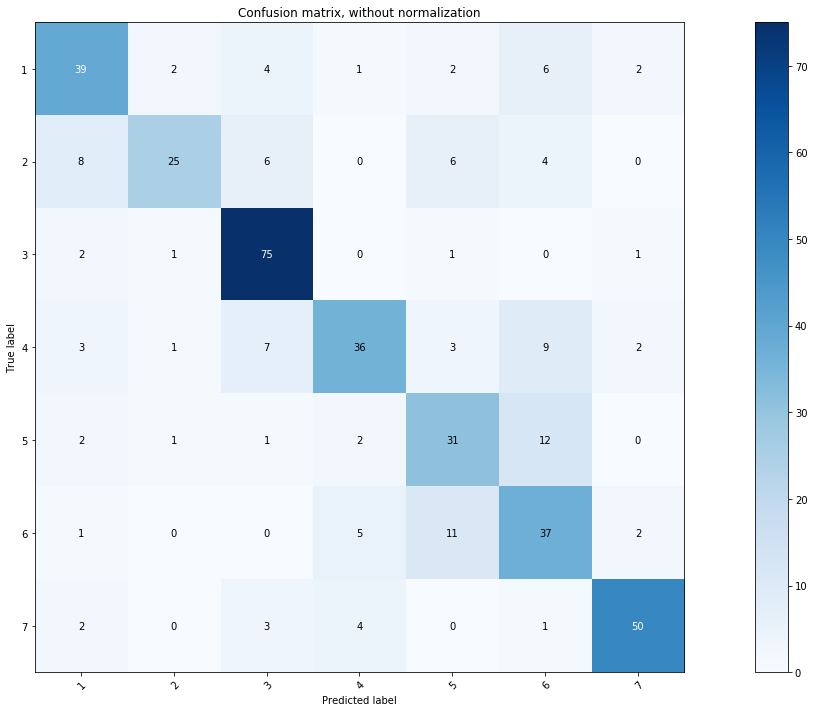

Accuracy: 0.7128953771289538
              precision    recall  f1-score   support

         Bar       0.68      0.70      0.69        56
   Histogram       0.83      0.51      0.63        49
         Pie       0.78      0.94      0.85        80
      Bubble       0.75      0.59      0.66        61
     Scatter       0.57      0.63      0.60        49
        Line       0.54      0.66      0.59        56
        Fool       0.88      0.83      0.85        60

    accuracy                           0.71       411
   macro avg       0.72      0.69      0.70       411
weighted avg       0.73      0.71      0.71       411



In [54]:
rf_clf = RandomForestClassifier(max_depth=12, n_estimators=120, random_state=42,bootstrap=False)
rf_clf.fit(X_train, y_train)
  
y_pred = rf_clf.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), np.unique(y))

print('Accuracy:', rf_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['Bar','Histogram','Pie','Bubble','Scatter','Line','Fool']))

In [34]:
key=0.69
for i in range(12,13):
    for j in range(120,123):
        for k in range(40,45):
            rf_clf = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=k,bootstrap=False)
            rf_clf.fit(X_train, y_train)
            if rf_clf.score(X_test, y_test)>key:
                key=rf_clf.score(X_test, y_test)
                print('Accuracy:', i, ' ',j, ' ',k, ' ',rf_clf.score(X_test, y_test))
print('done')        

Accuracy: 12   120   41   0.7007299270072993
Accuracy: 12   120   42   0.7128953771289538
done


In [16]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = rf_clf.estimators_[22]
str_tree = export_graphviz(estimator, 
   out_file='tree22F.dot', 
   feature_names=np.arange(40000), # column names
   filled=True,        
   special_characters=True, 
   rotate=True, 
   precision=2,
   rounded = True,)

from subprocess import call
call(['dot', '-Tjpg', 'tree22F.dot', '-o', '/content/gdrive/Team Drives/ML概論專題/tree22F.jpg', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = ("/content/gdrive/Team Drives/ML概論專題/tree22F.jpg"))

Output hidden; open in https://colab.research.google.com to view.